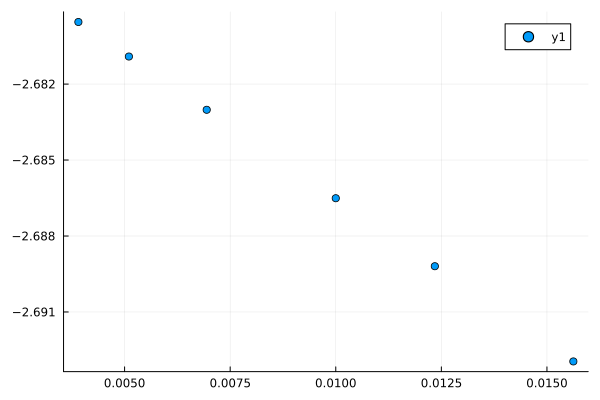

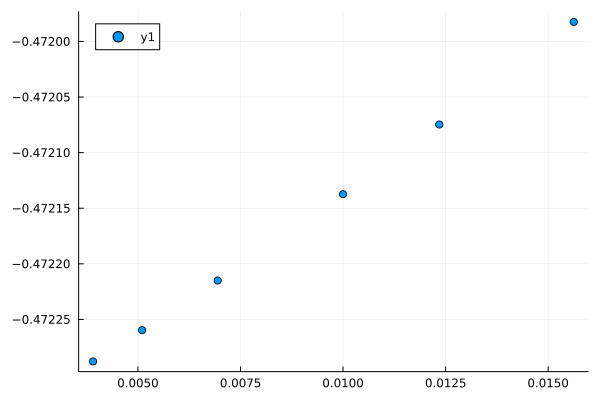

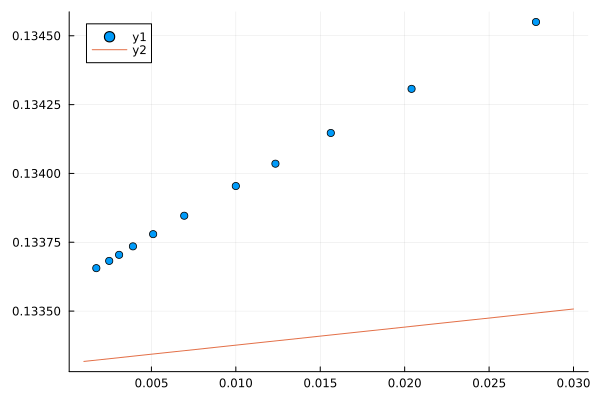

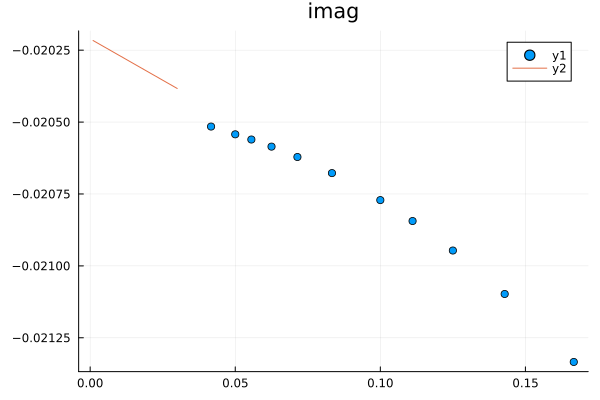

-1.1376342538869946+-1.0955102624611106e-5
0.02120788048748871+-3.1149219603506044e-5
0.13331056934307767+-1.5985047109447938e-5
-0.0202107010837459i +-1.753554627872979e-5
0.4618529732632701+-0.0002377589403225227
-0.22455088254389563i +-9.238274796633033e-6
1.1451194950819845+-0.0007122562224132691
-0.025763350363653497i +-0.0002672399553906917
1.1038583999286375+-0.00039245152671758474
-0.18277267445800882i +-0.0008168790951257418
1.468972076109557+-0.00039929699214809506
-0.24698898600869884i +-0.0011597600621031507
1.8679660122112405+-0.002317069074905507
-0.6409008519943843i +-0.0030231156879555253


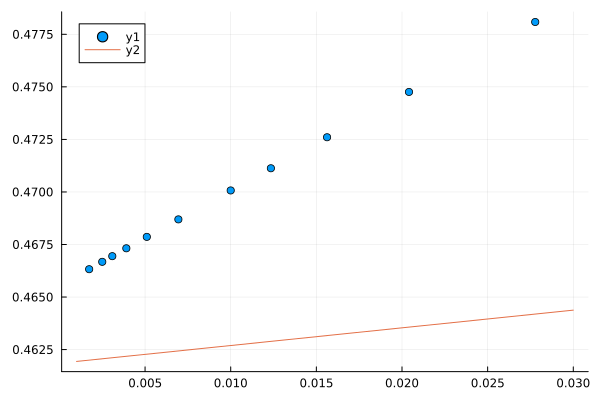

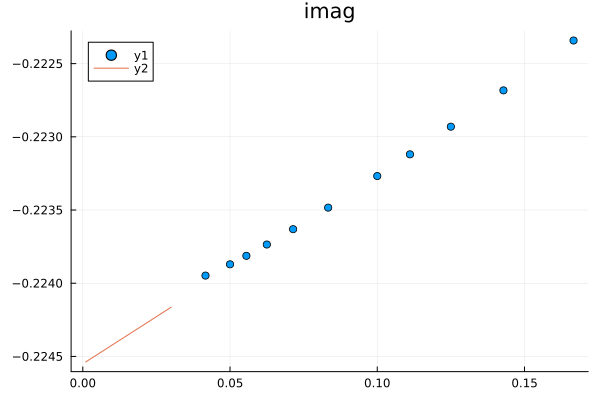

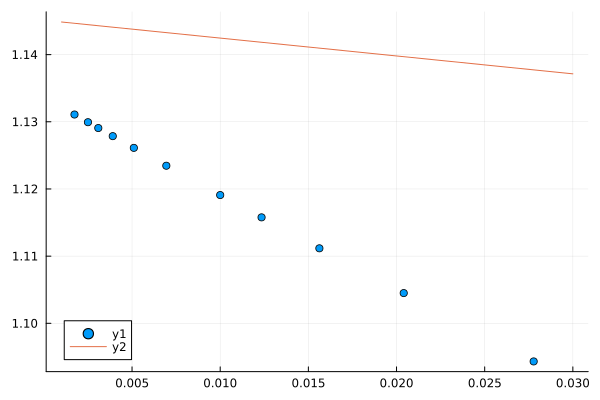

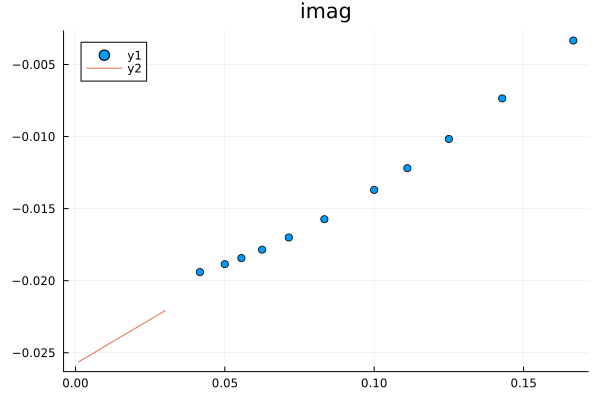

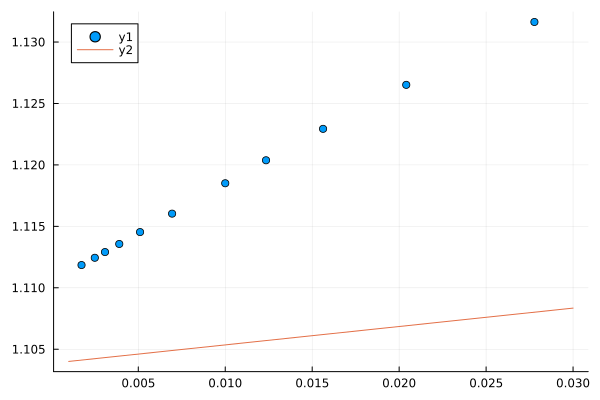

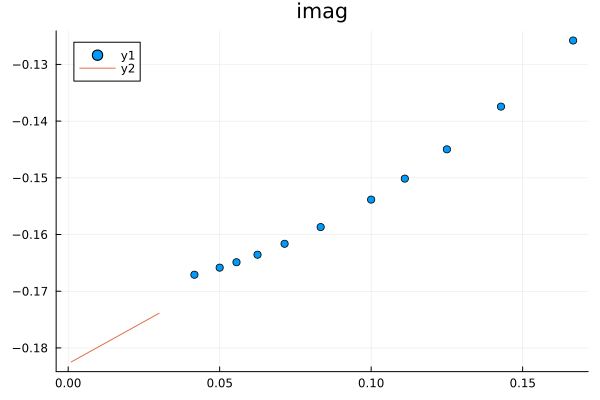

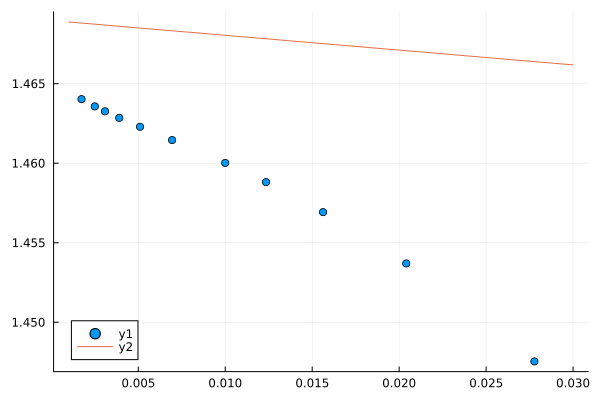

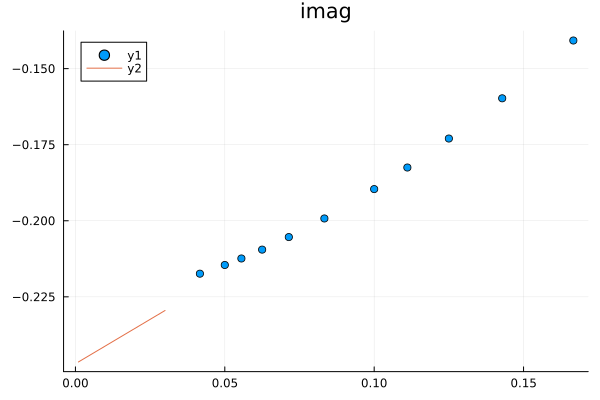

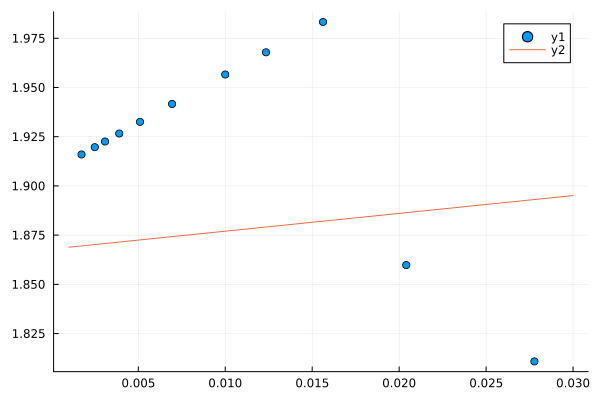

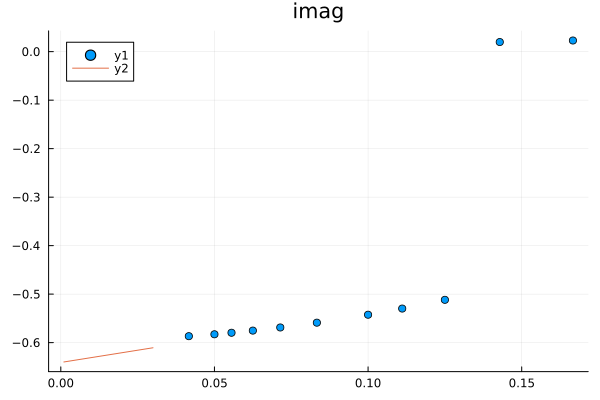

In [50]:
using JLD2, Plots, CurveFit
using LaTeXStrings,LsqFit
include("Potts-Operators & Hamiltonian.jl")
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
L_list =  [6,7,8,9,10,12,14,16,18,20,24]
#lambda_list = [0.0773 + 0.0593im, 0.078 + 0.0593im, 0.0787 + 0.0593im, 0.0773 + 0.06im, 0.078 + 0.06im, 0.0787 + 0.06im, 0.0773 + 0.0607im, 0.078 + 0.0607im, 0.0787 + 0.0607im]
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("Section3.2/D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1σ th"],1.1107-0.1701im,data[ "Δε th"]+1,1.9083-0.5987im]
labels = ["σ","ε","σ'","L1σ"]
cth = 1.13754733664723 - 0.0210687419403234im
lambda_list =[0.0788 + 0.0603im,]
levels = 6
Δ_list = zeros(ComplexF64,length(L_list),length(lambda_list),6)
E0_list = zeros(ComplexF64,length(L_list),length(lambda_list))
for (j,lambda) in enumerate(lambda_list)
    for (i,L) in enumerate(L_list[1:9])
        dataσ = load_object("Section3.2/PBC 120 L = $L,5statesQP0.0788 + 0.0603im.jld2")
        # if L < 8
        # data_alt = load_object("Section3.1/QuasiparticleAnsatz D80,L = $L,$lambda.jld2")
        # E0 = data_alt[1]
        # else
        if L == 8
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-4]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[4]
        Δ_list[i,j,4] = dataσ[3]
        Δ_list[i,j,5] = dataσ[end-2]
        Δ_list[i,j,6] = dataσ[end-1]
        elseif L == 6
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-3]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[3]
        Δ_list[i,j,4] = dataσ[4]
        Δ_list[i,j,5] = dataσ[end-1]
        Δ_list[i,j,6] = dataσ[end]
        else 
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-3]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[4]
        Δ_list[i,j,4] = dataσ[3]
        Δ_list[i,j,5] = dataσ[end-1]
        Δ_list[i,j,6] = dataσ[end]
        end
    end
for (i,L) in enumerate(L_list[10:end])
    #dataσ = load("sigma_analysis/sigma_Energy_$(L)_80.jld2")
    lambda_txt = lambda
    path = "Section3.3/entanglement/PBC"
    D = 120
    Dpe = 5*D
    results1 = load_object(path*"/5EXC0_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    results2 = load_object(path*"/5EXC1_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    # ψ_right = load_object("Section3.3/entanglement/D$Dpe"*"PBC/5GS_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    # H = Potts_Hamiltonian(L,lambda = lambda)
    # E0 = expectation_value(ψ_right,H)
    E0 = load_object("E0$L")
    E0_list[i+9,j] = E0
    Δ_list[i+9,j,1] = results2[2] 
    Δ_list[i+9,j,2] =  results1[2]
    Δ_list[i+9,:,4] .= results2[3] 
    Δ_list[i+9,:,3] .= results2[4]
    Δ_list[i+9,:,5] .= results1[3] 
    Δ_list[i+9,:,6] .= results1[end]
end
end
for (j,lambda) in enumerate(lambda_list)  
v = 2.881170633570556 - 0.7050332956915987im
labels = ["σ","ε","L-1σ","σ'","L-1ε","ε'"]
m(t, p) = p[1]  .+  p[2].*t .+   p[3].*t.^2 
julia> p0 = [0.5, 0.5]
ϵ0 = E0_list./L_list
param = LsqFit.curve_fit(m,1 ./L_list.^2,real(ϵ0[:,j].*(6/(pi*v))),[real(ϵ0[1]),1.1375,0])
p = scatter(1 ./L_list[3:8].^2,real(ϵ0[3:8] .*(6/(pi*v))))
display(p)
println(param.param[2],"+-",sqrt(LsqFit.estimate_covar(param)[2,2]))
param = LsqFit.curve_fit(m,1 ./L_list.^2,imag(ϵ0[:,j].*(6/(pi*v))),[imag(ϵ0[1]),1.1375,0])
p = scatter(1 ./L_list[3:8].^2,imag(ϵ0[3:8] .*(6/(pi*v))))
display(p)
println(param.param[2],"+-",sqrt(LsqFit.estimate_covar(param)[2,2]))
for i in 1:6
    p = scatter(1 ./L_list.^2,real(Δ_list[:,j,i].*L_list/(2*pi*v)))
    param = CurveFit.linear_fit(1 ./L_list[3:8].^1,(Δ_list[3:8,j,i].*L_list[3:8]/(2*pi*v)))
   
    x = 0.001:0.001:0.03
    plot!(p,x,real(param[2].*x .+ param[1]))
    display(p)
     p = scatter(1 ./L_list.^1,imag(Δ_list[:,j,i].*L_list./(2*pi*v)),title = "imag")
    
      plot!(p,x,imag(param[2].*x .+ param[1]))
    display(p)
    error = sqrt(1/4 * sum((abs.((real(param[2]./L_list[3:8].^1 .+ param[1]) .- real(Δ_list[3:8,j,i].*L_list[3:8]/(2*pi*v) )).^2)))) * sqrt(1/6 + 10.5 / sum(abs.([8,9,10,11,12,13].-10.5)))
    println(real(param[1]),"+-",error)
     error = sqrt(1/4 *sum(( abs.((imag(param[2]./L_list[3:8].^1 .+ param[1]) .- imag(Δ_list[3:8,j,i].*L_list[3:8]/(2*pi*v) )).^2)))) * sqrt(1/6 + 10.5 / sum(abs.([8,9,10,11,12,13].-10.5)))
    println(imag(param[1]),"i +-",error)
end
end


In [13]:
using JLD2, Plots, CurveFit
using LaTeXStrings,LsqFit
include("Potts-Operators & Hamiltonian.jl")
Q = 5
Vp = Vect[ZNIrrep{Q}](sector=>1 for sector in 0:Q-1)
L_list =  [6,7,8,9,10,12,14,16,18,20,24]
#lambda_list = [0.0773 + 0.0593im, 0.078 + 0.0593im, 0.0787 + 0.0593im, 0.0773 + 0.06im, 0.078 + 0.06im, 0.0787 + 0.06im, 0.0773 + 0.0607im, 0.078 + 0.0607im, 0.0787 + 0.0607im]
Op_label  = ["I","σ","ϵ","L-1ϵ"]
data = load("Section3.2/D500results.jld2")
Δth = [0,data["Δσ th "],data[ "Δε th"],data["ΔL1σ th"],1.1107-0.1701im,data[ "Δε th"]+1,1.9083-0.5987im]
labels = ["σ","ε","σ'","L1σ"]
cth = 1.13754733664723 - 0.0210687419403234im
lambda_list =[0.0788 + 0.0603im,]
levels = 6
Δ_list = zeros(ComplexF64,length(L_list),length(lambda_list),6)
E0_list = zeros(ComplexF64,length(L_list),length(lambda_list))
for (j,lambda) in enumerate(lambda_list)
    for (i,L) in enumerate(L_list[1:9])
        dataσ = load_object("Section3.2/PBC 120 L = $L,5statesQP0.0788 + 0.0603im.jld2")
        # if L < 8
        # data_alt = load_object("Section3.1/QuasiparticleAnsatz D80,L = $L,$lambda.jld2")
        # E0 = data_alt[1]
        # else
        if L == 8
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-4]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[4]
        Δ_list[i,j,4] = dataσ[3]
        Δ_list[i,j,5] = dataσ[end-2]
        Δ_list[i,j,6] = dataσ[end-1]
        elseif L == 6
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-3]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[3]
        Δ_list[i,j,4] = dataσ[4]
        Δ_list[i,j,5] = dataσ[end-1]
        Δ_list[i,j,6] = dataσ[end]
        else 
        E0 = dataσ[1]
        Eσ = dataσ[2]
        Eε = dataσ[end-3]
        E0_list[i,j] = E0
        Δ_list[i,j,1] = (Eσ )
        Δ_list[i,j,2] = Eε
        Δ_list[i,j,3] = dataσ[4]
        Δ_list[i,j,4] = dataσ[3]
        Δ_list[i,j,5] = dataσ[end-1]
        Δ_list[i,j,6] = dataσ[end]
        end
    end
for (i,L) in enumerate(L_list[10:end])
    #dataσ = load("sigma_analysis/sigma_Energy_$(L)_80.jld2")
    lambda_txt = lambda
    path = "Section3.3/entanglement/PBC"
    D = 120
    Dpe = 5*D
    results1 = load_object(path*"/5EXC0_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    results2 = load_object(path*"/5EXC1_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    # ψ_right = load_object("Section3.3/entanglement/D$Dpe"*"PBC/5GS_PBC_D$D"*"_L=$L"*"_$lambda_txt.jld2")
    # H = Potts_Hamiltonian(L,lambda = lambda)
    # E0 = expectation_value(ψ_right,H)
    E0 = load_object("E0$L")
    E0_list[i+9,j] = E0
    Δ_list[i+9,j,1] = results2[2] 
    Δ_list[i+9,j,2] =  results1[2]
    Δ_list[i+9,:,4] .= results2[3] 
    Δ_list[i+9,:,3] .= results2[4]
    Δ_list[i+9,:,5] .= results1[3] 
    Δ_list[i+9,:,6] .= results1[end]
end
end
for (j,lambda) in enumerate(lambda_list)  
v = 2.881170633570556 - 0.7050332956915987im
labels = ["σ","ε","L-1σ","σ'","L-1ε","ε'"]
i = 2
param = CurveFit.linear_fit(1 ./L_list[3:8].^1.0516,(Δ_list[3:8,j,i].*L_list[3:8]/(2*pi*v)))
   
     error = sqrt(1/4 *sum(( abs.((imag(param[2]./L_list[3:8].^1.0516 .+ param[1]) .- imag(Δ_list[3:8,j,i].*L_list[3:8]/(2*pi*v) )).^2)))) * sqrt(1/6 + 10.5 / sum(abs.([8,9,10,11,12,13].-10.5)))
    println(imag(param[1]),"i +-",error)
end


-0.2244945124812996i +-7.319160624639609e-6
